# Изучение закономерностей, определяющих успешность игр

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Мне нужно выявить определяющие успешность игры закономерности, доступные в открытых источниках до 2016 года. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

### Шаг. Откройте файл с данными и изучите общую информацию

Начинаю проект с открытия датафрейма и анализа общей информации.

In [1]:
# использую необходимые для работы библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# импортирую файл с данными в датафрейм Data
data = pd.read_csv('/datasets/games.csv')

# изучаю первые 5 строк датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# смотрю общие данные по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На этом этапе мы изучили датафрейм: размеры таблицы, названия колонок, наличие и объемы пропущенных данных, а также типы данных каждой колонки.

### Шаг. Подготовьте данные

Далее необходимо подготовить данные для исследовательского анализа.

In [4]:
# привожу названия колонок к нижнему регистру
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

# проверяю результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее необходимо поработать с типами данных в столбцах. Посмотрим, что там сейчас:
1. name - тип данных object, все ОК
2. platform - тип данных object, все ОК
3. year_of_release - тип данных float64, необходимо перевести данные столбца в int, это понадобится для дальнейших вычислений
4. genre - тип данных object, все ОК
5. na_sales - тип данных float64, все ОК
6. eu_sales - тип данных float64, все ОК
7. jp_sales - тип данных float64, все ОК
8. other_sales - тип данных float64, все ОК
9. critic_score и user_score - здесь много пропусков, займемся этими столбцами позже
10. rating - тип данных object, все ОК

In [5]:
# для начала посмотрим на строки, в которых в столбце year_of_release пропуски
year_of_release_nan = data.loc[data['year_of_release'].isna()]
year_of_release_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Считаю возможным удалить эти 269 строк по двум причинам:
* В них присутствуем множество пропусков и по другим колонкам (оценки и рейтинги).
* Число таких строк не превышает 2% от размера датафрейма, поэтому их удаление не исказит итоговые выводы по проекту.

In [6]:
data = data.dropna(subset=['year_of_release'])

In [7]:
# далее меняем тип данных в столбце year_of_release на int
data['year_of_release'] = data['year_of_release'].astype('int')
# проверяю результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# в описании к проекту говорилось, что в графе user_score может встретиться 'tbd', что означает 'to be discussed', т.е. рейтинг не определен, проверим, так ли это:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# да, так и есть, заменяем 'tbd' на 'nan', что в нашем случае все равно означает одно и тоже - 'без рейтинга'
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

# проверяем результат
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [10]:
# оценки получились дробные, поэтому переводим графу в тип данных float
data['user_score'] = data['user_score'].astype('float')

In [11]:
# проверяем, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# посмотрим, какие оценки в этой графе
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Все оценки без долей после точки, поэтому можно было бы перевести графу в тип данных int. Но в дальнейшем это не даст провести некоторые вычисления (проверено позже), поэтому оставляю тип данных float64.

На этом этапе мы поработали с типами данных, преобразовав их там, где это нужно для дальнейшей работы.

Приступаем к обработке пропусков.

In [13]:
# посчитаем пропуски
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [14]:
# удалим пропуски из колонок name и genre - их там по 2 штуки, поэтому удаление таких строк не исказит общую картину выборки
data = data.dropna(subset=['name', 'genre'])
# причина таких пропусков, судя по небольшому их числу - человеческий фактор

# заменим пропуски в столбцу rating на заглушку 'unknown', которая поможет нам в дальнейшем анализе данных
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

# проверим результат
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

С пропусками в графах critic_score, user_score и rating ничего не сделать, поскольку это могут быть новые игры, которые еще не успели быть оценены критиками и пользователями.

In [15]:
# посчитаем суммарные продажи игр во всех регионах и добавим эти данные в новый столбец датафйрема
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# посмотрим результат
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


На этапе предобработки данных мы сделали следующее:
* привели названия колонок к нижнему регистру;
* поработали с типами данных в столбцах, заменив для некоторых из типы данных на корректные, что позволит в дальнейшем проводить с ними вычисления;
* заменили пропуски в графе 'year_of_release' на нули;
* заменили 'tbd' на 'nan' в графе 'user_score', т.к. по сути это тоже самое, но наличие 'tbd' мешало бы нам проводить с данными в этой графе вычисления в дальнейшем;
* удалили по 2 пропуска в графах 'name' и 'genre', т.к. их там было по 2 штуки, и удаление ни на что не повлияет в дальнейшем;
* пропуски в графах 'critic_score', 'user_score' и 'rating' оставили без изменений, т.к., судя по всему, это новые игры, которые еще не получили свои оценки и рейтинги;
* рассчитали суммарные продажи каждой игры по всем регионам, поместив эти данные в новый столбец датафрейма.

На последнем этапе предобработки данных займемся поиском дублей игр. Искать дубли только по столбцу с названием в данном случае неправильно, т.к. игры с одинаковым названием часто выпускаются разными платформами, и эти игры - разный продукт. А вот если посмотреть игры, у которых помимо названия совпадают и платформы, то такие случаи уже будут дублями. Посмотрим, есть ли такие игры в датафрейме.

In [16]:
data[data.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Поиск явных дублей показал 6 совпадений - 3 игры выпущены на одной платформе по 2 раза. Кстати, Need for Speed: Most Wanted на платформе PS выпущен, судя по данным датасета, в разные годы - в 2005 и в 2012 году. Т.е. либо здесь ошибка в номере года, либо это не дубли.

In [17]:
# удалим дубли, оставив только первый вариант игры в каждой из пар
data = data.drop_duplicates(subset=['name', 'platform'], keep='first')

In [18]:
# проверим, что получилось
data[data.duplicated(subset=['name', 'platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


Дубли удалены, можем двигаться дальше.
Этап предобработки данных закончен, данные стали более чистыми (убрали часть пропусков) и удобными для дальнейшего анализа (заменили типы данных и т.д.).

### Шаг. Проведите исследовательский анализ данных

Приступаем к анализу данных.

Text(0, 0.5, 'Количество выпущенных игр')

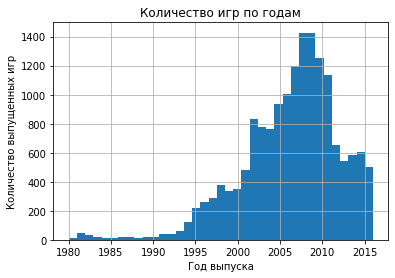

In [19]:
# построим гистограмму количества выпускаемых игр по годам в период с 1980 по 2016, подобрав число корзин (bins) и оптимальную область просмотра (range)
data['year_of_release'].hist(range = (1980, 2016), bins=37)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

На графике видно, что в период с 1980 по 1993 годы в год выпускалось по 10-20 игр. После 1994 года темпы выпуска игр стали резко расти, это длилось до 2010 года (в конце этого периода в год выпускалось по 1200-1400 игр). После этого наступил резкий спад - до 500-600 игр в год с 2011 по 2016 годы. На 2016 году данные заканчиваются. Что касается важности этих данных, то они показывают число произведенных игр по годам за период с 1980 по 2016 годы. Видно, как кол-во выпускаемых игр стоит сначала на протяжении 10-15 лет примерно на одном месте, после чего идет резкий рост числа выпущенных игр в год на протяжении примерно 15 лет со 100 до 1400 штук в год. После 2010 года идет обвал в 2 раза с пиковых значений - до 500-600 штук, и такое кол-во игр выпускается последующие 6 лет, пока данные не обрываются. Сложно сказать, какие данные можно отсюда отбросить, ведь это зависит от поставленной в будущем исследовательской задачи. Но, скорее всего, можно будет отбросить данные за период с 1980 по 1993 годы, когда игр выпускалось совсем немного.

Text(0, 0.5, 'Количество выпущенных игр')

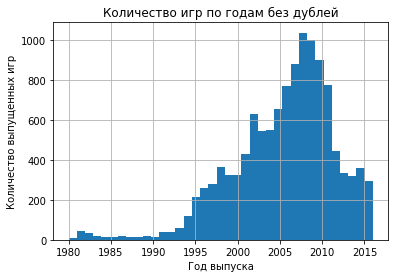

In [20]:
# посмотрим, изменится ли картина, если убрать из гистограммы игры, у которых одинаковое название и год выпуска
data.drop_duplicates(subset=['name', 'year_of_release'], keep='first')['year_of_release'].hist(range = (1980, 2016), bins=37)
plt.title("Количество игр по годам без дублей")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

Гистограмма без дублей игр по названию и году выпуска с точки зрения пиков и динамики не изменилась. Но изменился ее масштаб, например, пик 2008 года по числу игр находится в районе 1000 игр в отличие от прошлой гистограммы, где пик был в районе 1400 игр.

Далее изучим платформы, выпускающие игры.

In [21]:
# посмотрим на лидеров продаж по отдельным платформам
top_platforms = data['platform'].value_counts()
# выведем данные
top_platforms

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1231
PSP     1193
PS      1190
PC       956
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Text(0, 0.5, 'Число проданных игр')

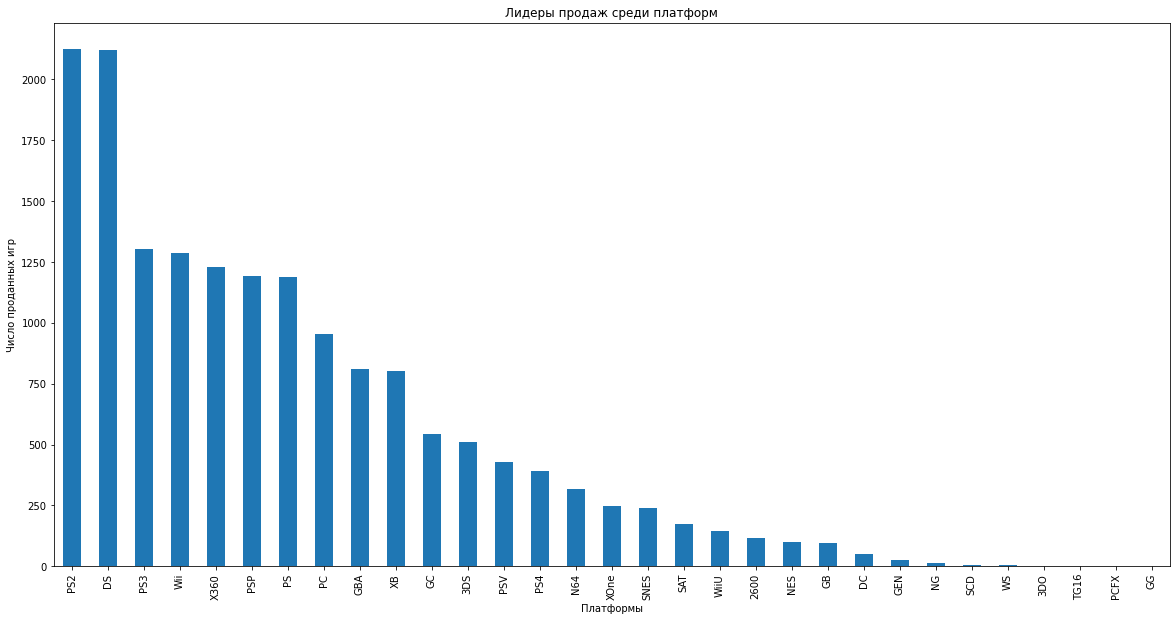

In [22]:
# визуализируем данные
top_platforms.plot(x="platform", y="all_sales", kind='bar', figsize=(20,10))
plt.title("Лидеры продаж среди платформ")
plt.xlabel("Платформы")
plt.ylabel("Число проданных игр")

У нас 7 явных лидеров по числу выпущенных игр:
* PS2 - 2161
* DS - 2151
* PS3 - 1331
* Wii - 1320
* X360 - 1262
* PSP - 1209
* PS - 1197

Их и будем подробнее рассматривать дальше. Посмотрим распределение выпущенных игр по годам для каждой из них.

Text(0, 0.5, 'Число релизов')

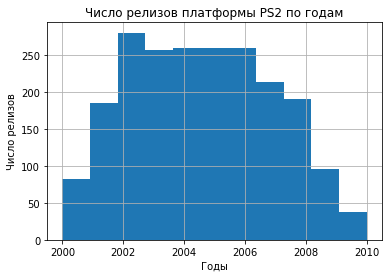

In [23]:
# создадим отдельный датафйрем для игр, выпущенных платформой PS2
ps2_platform = data.loc[data.loc[:,'platform'] == 'PS2']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
ps2_platform['year_of_release'].hist(range = (2000, 2010), bins=11)
plt.title("Число релизов платформы PS2 по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа PS2 выпустила первые игры в 2000 году, а последние - в 2010 году. За 3 первых года работы она вышла на пик количества выпускаемых игр (250+ штук), после чего держалась этих показателей 5 лет. После этого начался постепенный спад, длившийся 4 года, после чего компания перестала выпускать игры.

Text(0, 0.5, 'Число релизов')

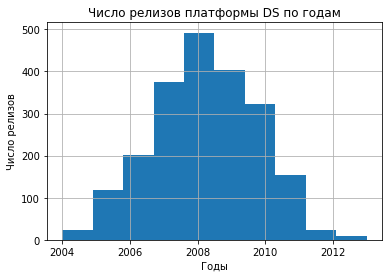

In [24]:
# создадим отдельный датафйрем для игр, выпущенных платформой DS
ds2_platform = data.loc[data.loc[:,'platform'] == 'DS']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
ds2_platform['year_of_release'].hist(range = (2004, 2013), bins=10)
plt.title("Число релизов платформы DS по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа DS2 выпустила первые игры в 2004 году, а последние - в 2013 году. На пик числа выпущенных игр в год (почти 500 штук) она выходила 5 лет, после чего сразу началось снижение темпов выпуска, и через 5 лет компания перестала их выпускать.

Text(0, 0.5, 'Число релизов')

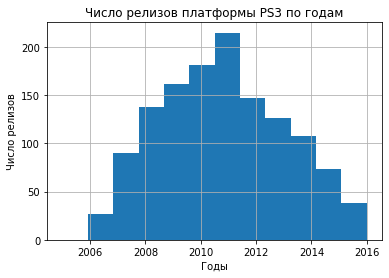

In [25]:
# создадим отдельный датафйрем для игр, выпущенных платформой PS3
ps3_platform = data.loc[data.loc[:,'platform'] == 'PS3']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
ps3_platform['year_of_release'].hist(range = (2005, 2016), bins=12)
plt.title("Число релизов платформы PS3 по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа PS3 выпустила первые игры в 2006 году, а последние - в 2016 году. Хотя данные в датафрейме обрываются на 2016 году, и платформа могла что-то выпускать и дальше, данные графика свидетельствуют о том, что цикл ее жизни приближался к окончанию. На пик числа выпущенных игр в год (200+ штук) она выходила 6 лет, после чего сразу началось снижение темпов выпуска, и через 5 лет компания выпустила всего порядка 40 игр. Как писал выше, данные датафрейма на этом обрываются.

Text(0, 0.5, 'Число релизов')

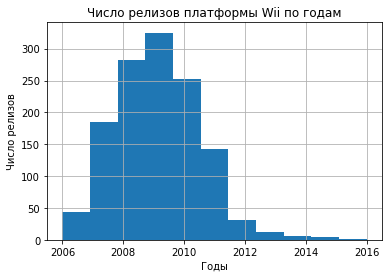

In [26]:
# создадим отдельный датафйрем для игр, выпущенных платформой Wii
wii_platform = data.loc[data.loc[:,'platform'] == 'Wii']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
wii_platform['year_of_release'].hist(range = (2006, 2016), bins=11)
plt.title("Число релизов платформы Wii по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа Wii выпустила первые игры в 2006 году, а последние - в 2016 году. На пик числа выпущенных игр в год (300+ штук) она выходила 4 года, после чего сразу началось снижение темпов выпуска, и через 4 года (после 2013) компания почти перестала их выпускать. В 2014-2016 годах темпы выпуска новых игр были ничтожно малы, поэтому можно сказать, что компания по-настоящему продуктивно работала с 2006 по 2013 годы.

Text(0, 0.5, 'Число релизов')

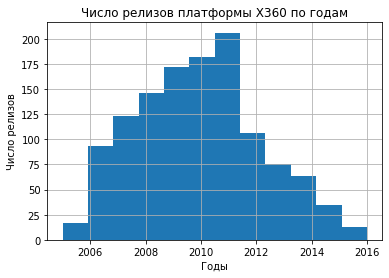

In [27]:
# создадим отдельный датафйрем для игр, выпущенных платформой X360
x360_platform = data.loc[data.loc[:,'platform'] == 'X360']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
x360_platform['year_of_release'].hist(range = (2005, 2016), bins=12)
plt.title("Число релизов платформы X360 по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа X360 выпустила первые игры в 2005 году, а последние - в 2016 году, после чего данные в датафрейме обрываются. Но из них видно, что цикл жизни компании уже подходил к концу. На пик числа выпущенных игр в год (200+ штук) она выходила 7 лет, после чего сразу началось снижение темпов выпуска, и через 5 лет компания почти перестала их выпускать. Как писал выше, данные датафрейма на этом обрываются.

Text(0, 0.5, 'Число релизов')

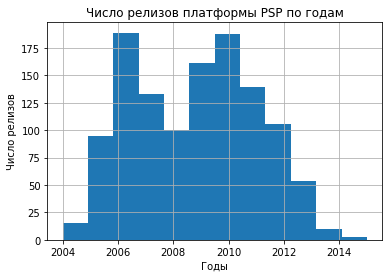

In [28]:
# создадим отдельный датафйрем для игр, выпущенных платформой PSP
psp_platform = data.loc[data.loc[:,'platform'] == 'PSP']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
psp_platform['year_of_release'].hist(range = (2004, 2015), bins=12)
plt.title("Число релизов платформы PSP по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа PSP выпустила первые игры в 2004 году, а последние - в 2015 году. На первый пик числа выпущенных игр в год (почти 200 штук) она выходила 2 годы, после чего был трехлетний спад. Далее снова пик (почти 200 игр в год), после этого сразу началось снижение темпов выпуска, и через 5 лет компания почти перестала их выпускать. Это первая платформа из рассмотренных, у которой имеется 2 пика в графике по числу выпущенных игр в год.

Text(0, 0.5, 'Число релизов')

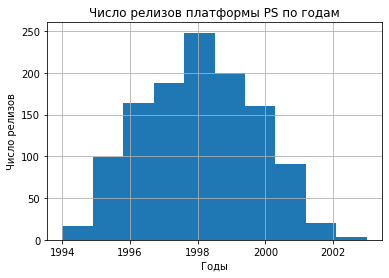

In [29]:
# создадим отдельный датафйрем для игр, выпущенных платформой PS
ps_platform = data.loc[data.loc[:,'platform'] == 'PS']
# построим график выпуска игр по годам для данной платформы, подобрав число корзин (bins) и оптимальную область просмотра (range) 
ps_platform['year_of_release'].hist(range = (1994, 2003), bins=10)
plt.title("Число релизов платформы PS по годам")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Платформа PS выпустила первые игры в 1994 году, а последние - в 2003 году. На пик числа выпущенных игр в год (250 штук) она выходила 5 лет, после чего сразу началось снижение темпов выпуска, и через 5 лет компания почти перестала их выпускать.

Общий вывод по 7 ТОП-овым платформам такой:
* Средний срок "жизни" платформы - 11 лет.
* Обычно за 5 лет с момента появления первых релизов платформа достигает пика в плане числа выпущенных игр в год.
* После пика, который длится обычно 1 год, идет спад числа выпусков новых игр и через 5 лет спада платформа перестает выпускать новые игры.

Если мы говорим про актуальный период для построения прогнозов для 2017 года, то нужно взять 3 последних года перед 2017 годом, т.е. период с 2014 по 2016 годы. Это связано с тем, что сейчас тренды очень быстро меняются, и больший промежуток времени лучше не брать - он может исказить прогноз на 2017 год. При этом период в 2 года считаю маленьким, т.к. в описании к проекту написано, что данные за 2016 год могут быть неполными. Если смотреть динамику за 2 года, один из которых неполный, можно также сделать неверный общий вывод. Поэтому в нашем случае период в 3 года с 2014 по 2016 считаю оптимальным.

In [30]:
data_2014 = data.query('year_of_release >= 2014')
# посмотрим на лидеров продаж по отдельным платформам с 2014 года
top_platforms_2014 = data_2014['platform'].value_counts()
# выведем данные
top_platforms_2014

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Получилось 10 платформ, посмотрим на общем графике их динамику по числу релизов за последние 3 года.

Text(0, 0.5, 'Число релизов')

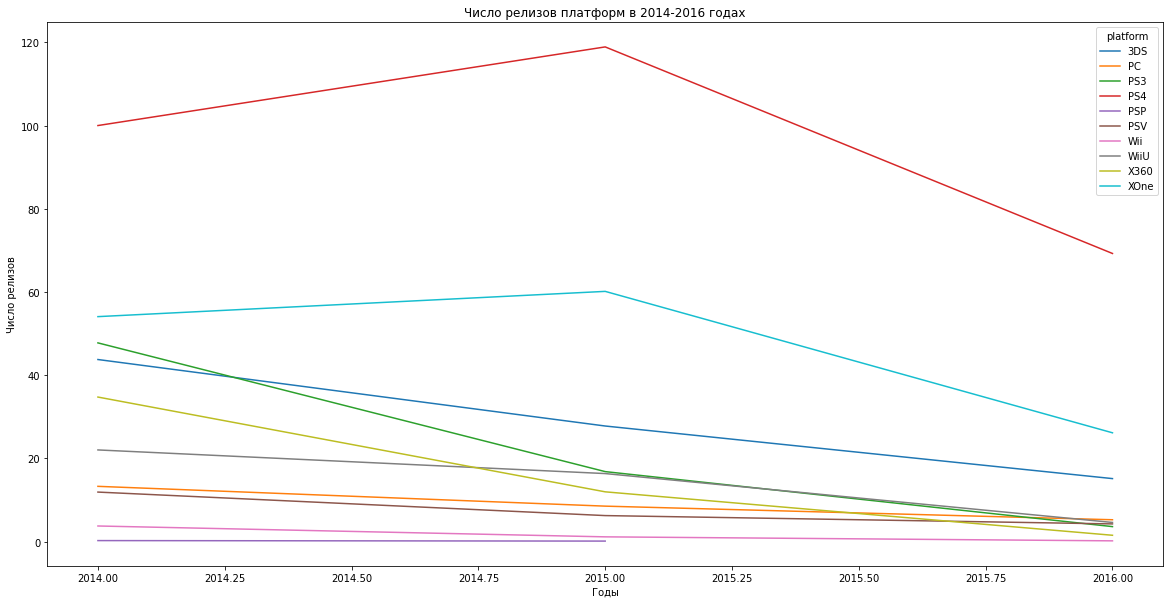

In [31]:
top_platforms_2014_unique = data_2014['platform'].unique()
data_2014.query('platform in @top_platforms_2014_unique') \
.pivot_table(index=['year_of_release'], columns=['platform'], values='all_sales', \
aggfunc='sum').reset_index().plot(x='year_of_release', figsize=(20, 10))
plt.title("Число релизов платформ в 2014-2016 годах")
plt.xlabel("Годы")
plt.ylabel("Число релизов")

Выводы по анализу платформ за последние 3 года:
* Динамика у платформ по числу новых продаж в год отрицательная (т.е. число продаж снижается). Правда, стоит учесть, что по условиям задания данные за 2016 год могут быть неполными. Непонятно, за какой период 2016 года их может не хватать. Если за 1-2 месяца, то это не сильно исказить последний график. А если за бОльший период, часть платформ может показать не падение, а тот же уровень продаж, как в 2015 году, а то и рост. Последнее может быть актуально для платформы 3DS, у которой по данным из графика число продаж в 2015 и 2016 году одинаковое.
* Лидеры по продажам: PS4, 3DS и XOne.
* По остальным платформам продажи за последние годы минимальны и почти равны нулю по итогам 2016 года.
* Из потенциально прибыльных платформ выберу только одну - 3DS, т.к. продажи по ней за 2016 год равны продажам за 2015 год. С учетом возможной неполноты данных за 2016 год она может показать рост. А дальше все зависит от того, за какой период 2016 года может не хватать данных. Если больше, чем за полгода, то могут рост показать даже PS4 и XOne, но это все в теории.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0, 0.5, 'Глобальные продажи')

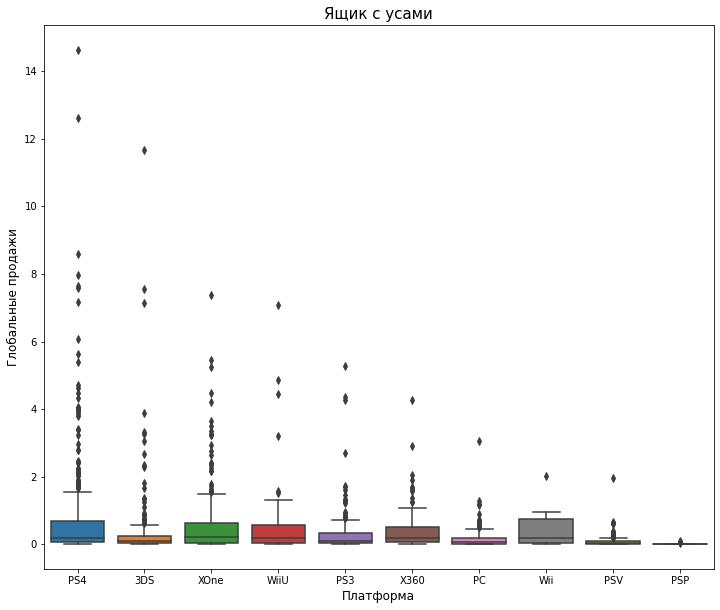

In [32]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data_2014, x='platform', y='all_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи', fontsize=12)

(0.0, 0.85)

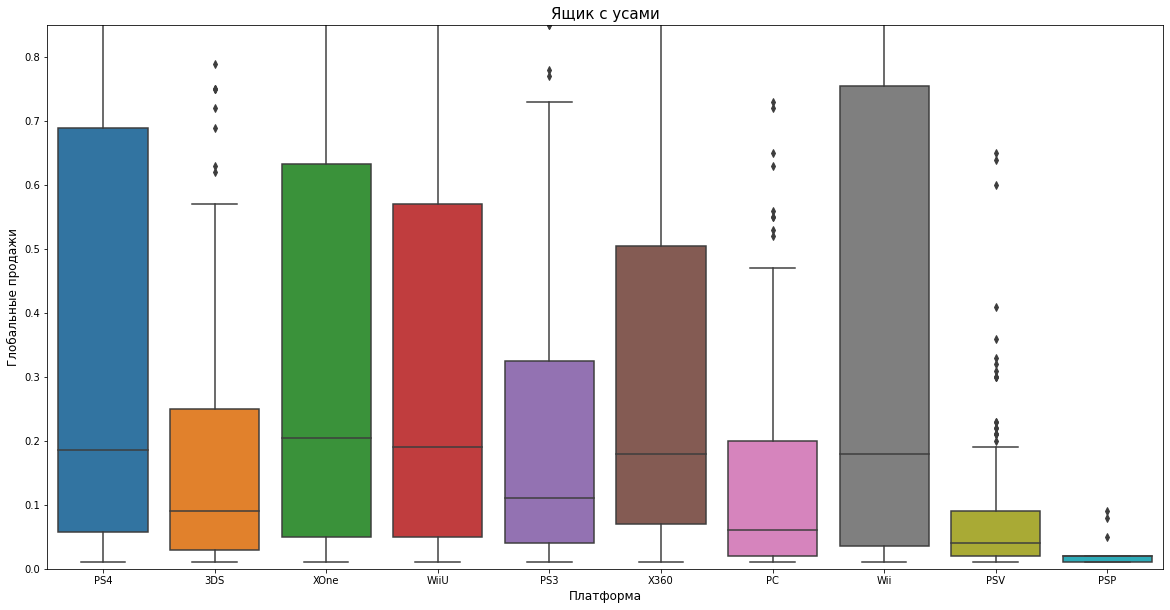

In [33]:
# увеличим масштаб, убрав выбросы, чтобы лучше рассмотреть квартили и медианы по каждой платформе
plt.figure(figsize=(20,10))
sns.boxplot(data=data_2014, x='platform', y='all_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи', fontsize=12)
plt.ylim(0, 0.85)

In [34]:
# дополнительно выведем данные по платформам с помощью функции .describe()
data_2014.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Выводы по ящику с усами:
* У разных платформ разные медианы. Наибольшее значение имеют такие платформы (в порядке убывания): Xone, WiiU, PS4, Wii и X360. У этих платформ наибольшие продажи.
* Наибольшие верхние квартили – у платформ Wii, PS4, Xone, WiiU и X360.
* Общее у всех платформ то, что медиана у них ближе к нижнему квартилю.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве примера возьмем самую популярную платформу по числу продаж за период с 2014 по 2016 годы - PS4.

In [35]:
# создадим датафрейм с данными по платформе PS4
ps4_corr = data_2014[data_2014['platform']=='PS4']
# рассчитаем корреляцию между отзывами пользователей и продажами платформы по всему миру
ps4_corr['user_score'].corr(ps4_corr['all_sales'])

-0.040131589472697356

Корреляция слабо отрицательная.

In [36]:
# рассчитаем корреляцию между отзывами критиков и продажами платформы по всему миру
ps4_corr['critic_score'].corr(ps4_corr['all_sales'])

0.40266141068104083

Корреляция слабо положительная.

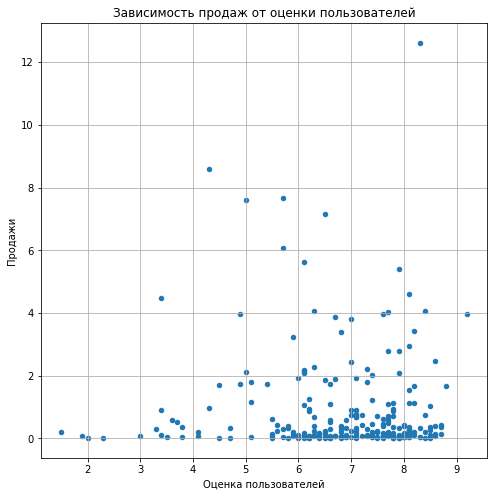

In [37]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей
data_2014[data_2014['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки пользователей")
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
plt.show()

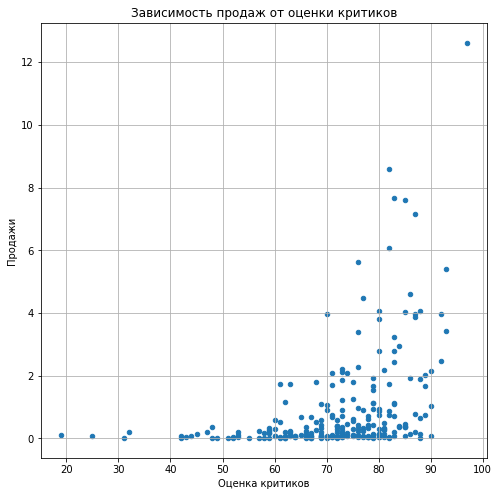

In [38]:
# построим диаграмму рассеяния зависимости продаж от оценки критиков
data_2014[data_2014['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки критиков")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.show()

Вывод по корреляции оценок пользователей и критиков с продажами платформы PS4 такой:
* В основном критики и пользователи дают высокие оценки играм платформы.
* При этом корреляция с продажами слабая (с оценкой пользователей слабо отрицательная: -0.040131589472697356; с оценкой критиков - 0.40266141068104083 - слабо положительная).
* Диаграммы рассеяния подтвердили эти выводы.
* Продажи игр платформы PS4, как и остальных платформ, за период 2014-2016 года падали.

Посмотрим на примере еще 2 популярных платформ, подтвердится ли наш вывод.

In [39]:
# создадим датафрейм с данными по платформе 3DS
corr_3ds = data_2014[data_2014['platform']=='3DS']
# рассчитаем корреляцию между отзывами пользователей и продажами платформы по всему миру
corr_3ds['user_score'].corr(corr_3ds['all_sales'])

0.2151932718527028

Корреляция слабо положительная.

In [40]:
# рассчитаем корреляцию между отзывами критиков и продажами платформы по всему миру
corr_3ds['critic_score'].corr(corr_3ds['all_sales'])

0.314117492869051

Корреляция слабо положительная.

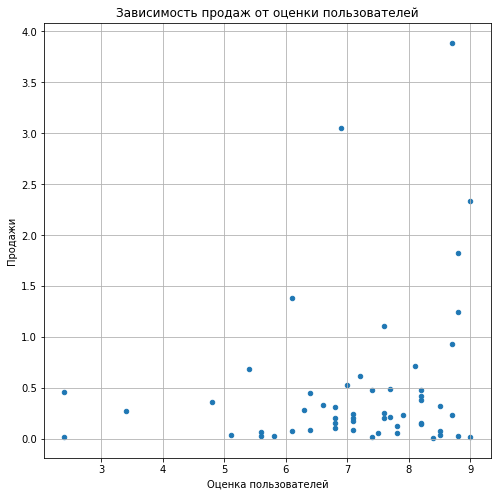

In [41]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей
data_2014[data_2014['platform']=='3DS'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки пользователей")
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
plt.show()

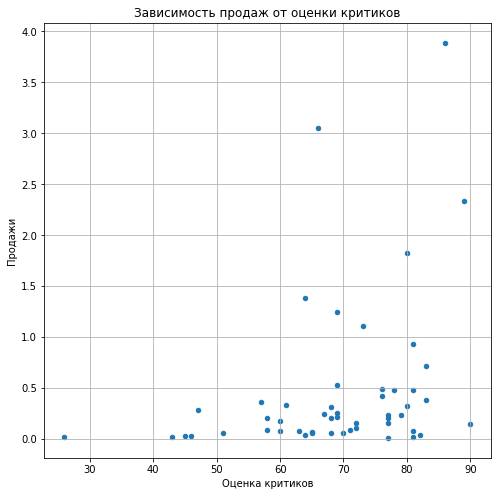

In [42]:
# построим диаграмму рассеяния зависимости продаж от оценки критиков
data_2014[data_2014['platform']=='3DS'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки критиков")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.show()

Вывод по корреляции оценок пользователей и критиков с продажами платформы 3DS такой:

* В основном критики и пользователи дают высокие оценки играм платформы.
* При этом корреляция с продажами слабая (с оценкой пользователей слабо положительная: 0.2151932718527028; с оценкой критиков - 0.314117492869051 - тоже слабо положительная).
* Диаграммы рассеяния подтвердили эти выводы.
* Продажи игр платформы 3DS, как и остальных платформ, за период 2014-2016 года падали.

In [43]:
# создадим датафрейм с данными по платформе XOne
xone_corr = data_2014[data_2014['platform']=='XOne']
# рассчитаем корреляцию между отзывами пользователей и продажами платформы по всему миру
xone_corr['user_score'].corr(xone_corr['all_sales'])

-0.0703839280647581

Корреляция слабо отрицательная.

In [44]:
# рассчитаем корреляцию между отзывами критиков и продажами платформы по всему миру
xone_corr['critic_score'].corr(xone_corr['all_sales'])

0.42867694370333226

Корреляция слабо положительная.

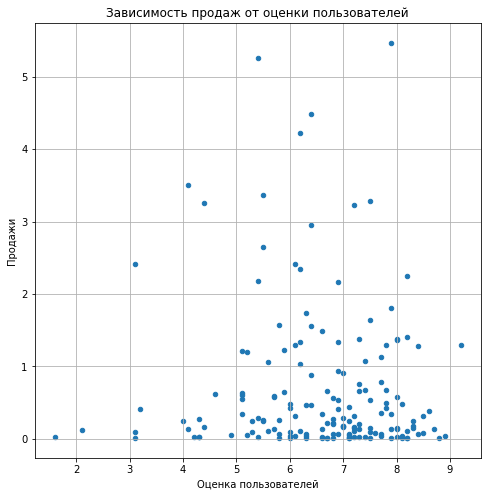

In [45]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей
data_2014[data_2014['platform']=='XOne'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки пользователей")
plt.xlabel("Оценка пользователей")
plt.ylabel("Продажи")
plt.show()

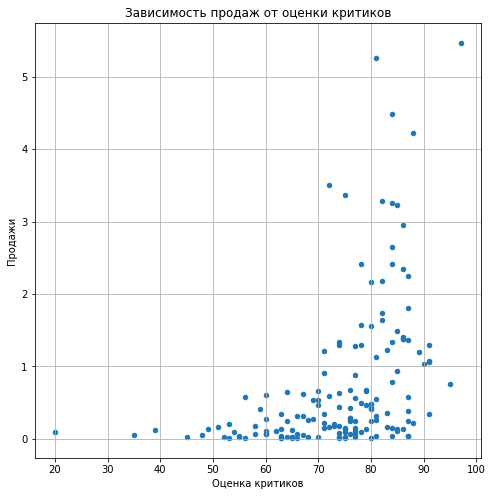

In [46]:
# построим диаграмму рассеяния зависимости продаж от оценки критиков
data_2014[data_2014['platform']=='XOne'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(8,8), grid=True)
plt.title("Зависимость продаж от оценки критиков")
plt.xlabel("Оценка критиков")
plt.ylabel("Продажи")
plt.show()

Вывод по корреляции оценок пользователей и критиков с продажами платформы XOne такой:

* В основном критики и пользователи дают высокие оценки играм платформы.
* При этом корреляция с продажами слабая (с оценкой пользователей слабо отрицательная: -0.0703839280647581; с оценкой критиков - 0.42867694370333226 - слабо положительная).
* Диаграммы рассеяния подтвердили эти выводы.
* Продажи игр платформы XOne, как и остальных платформ, за период 2014-2016 года падали.

На основе изучения коэффициентов корреляции между продажами и оценками пользователей и критиков для релизов 3 самых продаваемых платформ в 2014-2016 году делаем вывод, что корреляция между этими показателями слабая. Это видно как из коэффициентов корреляции, так и из диаграмм рассеяния этих параметров. При этом продажи по всем платформам с 2014 по 2016 падали.

Проанализируем распределение жанров игр по продажам.

Text(0.5, 1.0, 'Зависимость продаж от жанра игры')

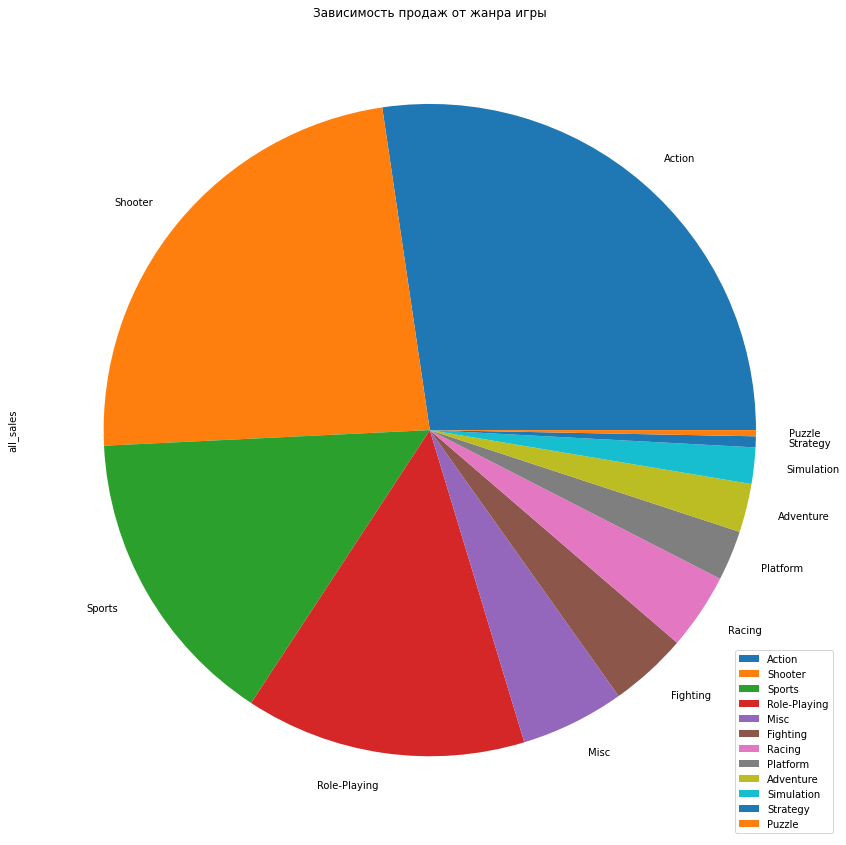

In [47]:
# построим круговую диаграмму
data_pie = data_2014.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'all_sales').plot(kind='pie', subplots=True, figsize=(15,15))
plt.title("Зависимость продаж от жанра игры")

In [48]:
# выведем числовые значения для выводов
data_2014.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'all_sales')

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Выводы по распределению жанров игр по продажам, если берем в расчет сумму продаж:
* Больше всего продаются игры таких жанров: Action, Sports и Shooter.
* Меньше всего - таких жанров: Adventure и Strategy

Теперь оценим медианные значения по продажам, чтобы оценить наиболее прибыльные жанры. Такой метод оценки успешности жанров позволит исключить ситуацию, когда какой-то жанр берет верх не качеством, а количеством выпущенных игр.

In [49]:
data_2014.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'mean').sort_values(ascending=False, by = 'all_sales')

,all_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


Выводы по распределению жанров игр по продажам, если берем в расчет медиану продаж:
* Больше всего продаются игры таких жанров: Shooter (с очень большим отрывом), Sports, Platform и Fighting.
* Меньше всего - таких жанров: Strategy и Adventure.

Выводы по исследовательскому анализу данных:
* Первые игры начали выходить в 1980 году. Вплоть до 1994 года кол-во новых релизов в год не превышало 50 штук по всем существующим на тот момент платформам. Начиная с 1994 года и до 2010 индустрия переживает колоссальный подъем: на пике в 2009 году все платформы в сумме выпустили более 1400 новых игр. Далее идет резкий обвал числа выпущенных игр в 2 раза – до 500-600 штук в год. Данные обрываются на 2016 году.
* Абсолютными лидерами по числу выпущенных игр за период с 1980 по 2016 годы стали платформы PS2 и DS – они выпустили по 2150+ игр.
* По результату анализа данных по 7 платформам – лидерам по числу релизов выяснилось следующее:
- Средний срок "жизни" платформы - 11 лет.
- Обычно за 5 лет с момента появления первых релизов платформа достигает пика в плане числа выпущенных игр в год.
- После пика, который длится обычно 1 год, идет спад числа выпусков новых игр и через 5 лет спада платформа перестает выпускать новые игры.
* В качестве актуального периода, который подходит для прогнозирования данных на 2017 год я взял 2014-2016 годы, как наиболее актуальные для динамично развивающегося сегмента компьютерных игр. В случае, если бы данные за 2016 год были полные, достаточным актуальным периодом был бы 2015-2016 годы. По результатам исследования актуального периода выяснилось следующее:
- Динамика у платформ по числу новых продаж в год отрицательная (т.е. число продаж снижается). Правда, стоит учесть, что по условиям задания данные за 2016 год могут быть неполными. Поэтому, часть платформ могла показать не падение, а тот же уровень продаж, как в 2015 году, а то и рост. Последнее было бы актуально для платформы 3DS, у которой по данным из графика число продаж в 2015 и 2016 году одинаковое.
- Лидеры по продажам: PS4, 3DS и XOne.
- По остальным платформам продажи за последние годы минимальны и почти равны нулю по итогам 2016 года.
- Из потенциально прибыльных платформ была выбрана только одна - 3DS, т.к. продажи по ней за 2016 год равны продажам за 2015 год. С учетом возможной неполноты данных за 2016 год она может показать рост.
* Корреляция между оценками критиков и пользователей и продажами игр слабая, это подтверждено исследованием данных по 3 лидерам продаж за актуальный период. При этом в основном критики и пользователи дают высокие оценки играм платформы.
* Исследование распределения жанров игр по продажам (по медиане) показало следующее: больше всего продаются игры таких жанров  Shooter (с очень большим отрывом), Sports, Platform и Fighting; меньше всего - таких жанров: Strategy и Adventure.


### Шаг. Составьте портрет пользователя каждого региона

Text(0, 0.5, 'Продажи')

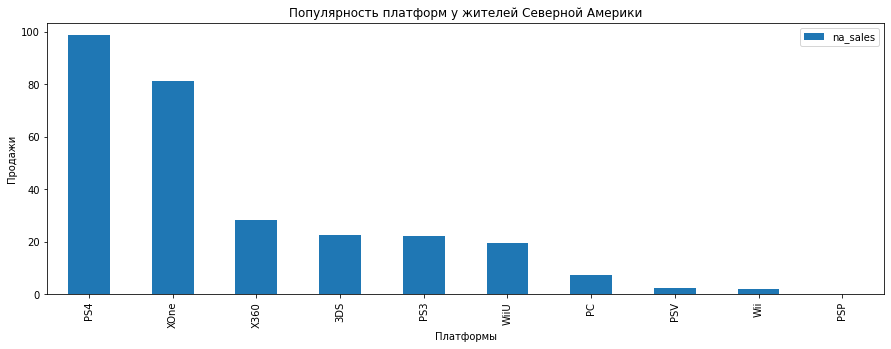

In [50]:
# построим график популярности платформ у жителей Северной Америки
data_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность платформ у жителей Северной Америки")
plt.xlabel("Платформы")
plt.ylabel("Продажи")

Самая популярная платформа в Северной Америке - PS4 (Япония). Далее идут XOne и X360 (обе - США). Далее по степени убывания популярности идут 3DS и PS3 (обе - Япония). Лидером для Северной Америки является японская PS4. На 2 и 3 местах в ТОП-5 - "родные" XOne и X360, далее в ТОП-5 еще 2 японские платформы. Продажи японских платформ из ТОП-5 суммарно ненамного, но превосходят продажи "родных" XOne и X360.

Text(0, 0.5, 'Продажи')

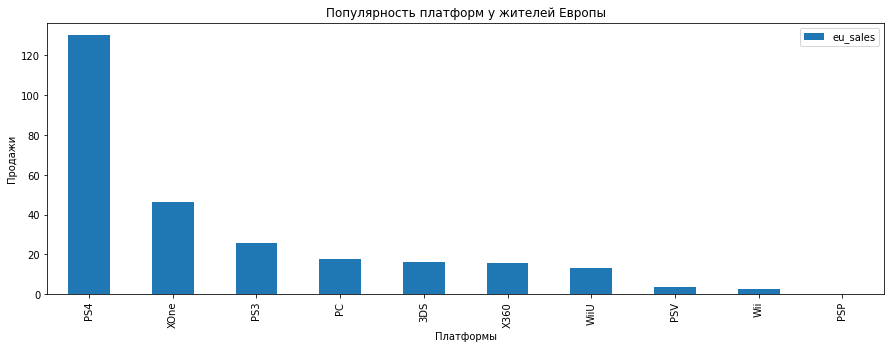

In [51]:
# построим график популярности платформ у жителей Европы
data_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность платформ у жителей Европы")
plt.xlabel("Платформы")
plt.ylabel("Продажи")

Здесь ТОП-1 с большим отрывом за PS4 (Япония). Далее идет американская XOne. 3 последних места в ТОП-5 занимают также японские платформы (PS3, PS и 3DS). Суммарно продажи японских платформ из ТОП-5 в несколько раз превосходят американскую XOne.

Text(0, 0.5, 'Продажи')

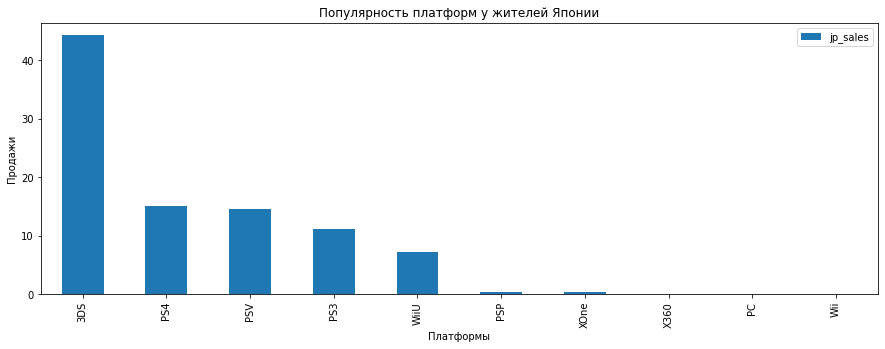

In [52]:
# построим график популярности платформ у жителей Японии
data_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность платформ у жителей Японии")
plt.xlabel("Платформы")
plt.ylabel("Продажи")

Здесь ТОП-5 ожидаемо заняли только японские платформы: 3DS (с заметным отрывом), PS4, PSV, PS3 и WiiU. Также из графика видно, что в Японии популярные японские платформы несколько отличаются от японских в Северной Америки и Европы.

В Северной Америке на первом месте по продажам японская платформа PS4. На 2 и 3 местах - "отчественные" XOne и X360. На 4 и 5 местах - снова японские 3DS и PS3.  Продажи японских платформ из ТОП-5 суммарно ненамного, но превосходят продажи "родных" XOne и X360.
В Европе ТОП-1 с большим отрывом за PS4 (Япония). Далее идет американская XOne. 3 последних места в ТОП-5 занимают также японские платформы (PS3, PS и 3DS). Суммарно продажи японских платформ из ТОП-5 в несколько раз превосходят американскую XOne.
В Японии ТОП-5 - сплошные "отечественные" японские платформы, что интересно, так это то, что игры на платформе X360 в Японии практически не покупаются.

Text(0, 0.5, 'Продажи')

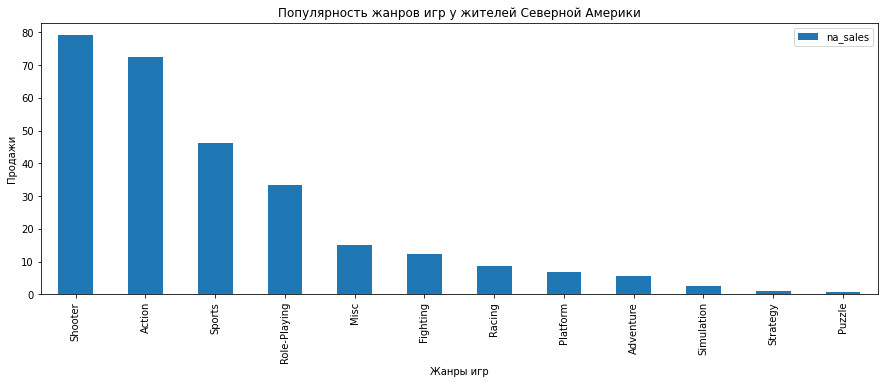

In [53]:
# построим график популярности жанров игр у жителей Северной Америки
data_2014.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность жанров игр у жителей Северной Америки")
plt.xlabel("Жанры игр")
plt.ylabel("Продажи")

ТОП-5 лидеров жанров среди игр в Северной Америке выглядит так: Shooter, Action, Sports, Role-Playing и Misc.

Text(0, 0.5, 'Продажи')

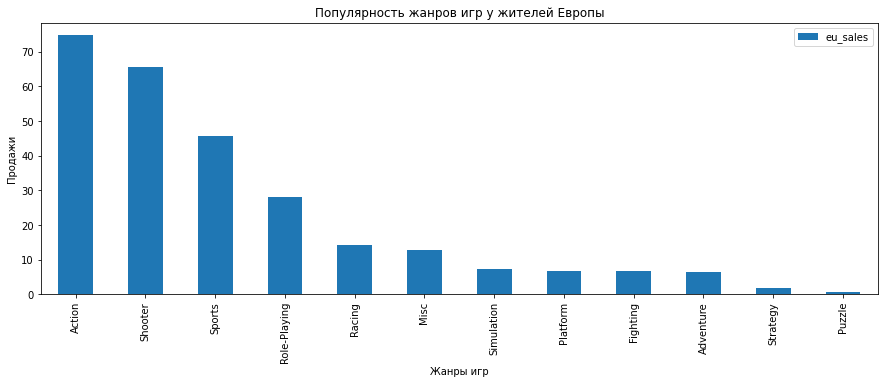

In [54]:
# построим график популярности жанров игр у жителей Европы
data_2014.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность жанров игр у жителей Европы")
plt.xlabel("Жанры игр")
plt.ylabel("Продажи")

ТОП-5 лидеров жанров среди игр в Европе выглядит так: Action, Shooter, Sports, Role-Playing и Racing.

Text(0, 0.5, 'Продажи')

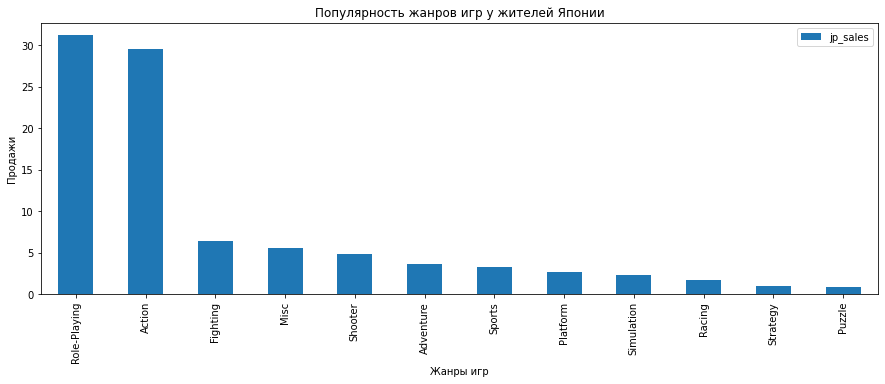

In [55]:
# построим график популярности жанров игр у жителей Японии
data_2014.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Популярность жанров игр у жителей Японии")
plt.xlabel("Жанры игр")
plt.ylabel("Продажи")

ТОП-5 лидеров жанров среди игр в Японии выглядит так: Role-Playing, Action, Fighting, Misc и Shooter.

У жителей Северной Америки и Европы во многом похожие предпочтения по тематике игр: им нравятся Shooter, Action, Sports и Role-Playing. При этом лидирующие в ТОП-5 игр по этим регионам не имеют серьезного отрыва: ТОП достаточно ровный. У жителей Японии с колоссальным отрывом лидируют жанры Role-Playing и Action, остальные жанры в ТОПе намного менее популярны, чем эти 2 первых.

Text(0, 0.5, 'Продажи')

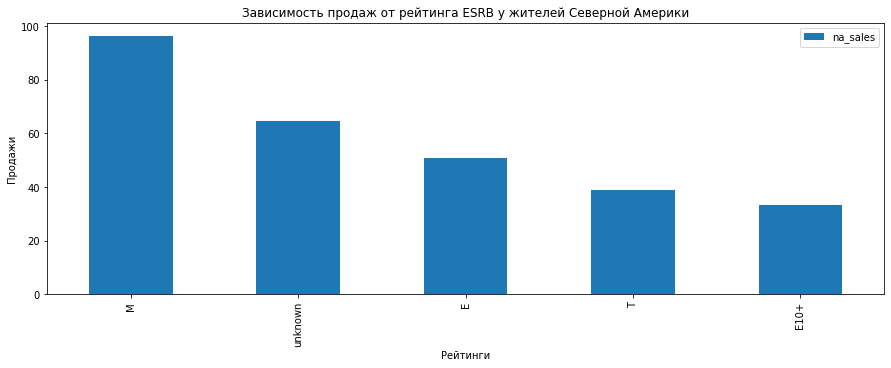

In [56]:
# построим график зависимости продаж от рейтинга ESRB у жителей Северной Америки
data_2014.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Зависимость продаж от рейтинга ESRB у жителей Северной Америки")
plt.xlabel("Рейтинги")
plt.ylabel("Продажи")

ТОП-3 лидеров рейтингов по классификации ESRB среди игр в Северной Америке выглядит так: M, игры без рейтинга и E.

Text(0, 0.5, 'Продажи')

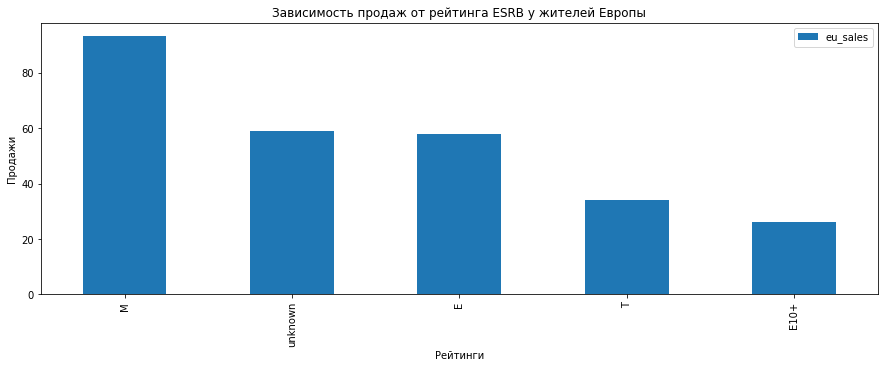

In [57]:
# построим график зависимости продаж от рейтинга ESRB  у жителей Европы
data_2014.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Зависимость продаж от рейтинга ESRB у жителей Европы")
plt.xlabel("Рейтинги")
plt.ylabel("Продажи")

ТОП-3 лидеров рейтингов по классификации ESRB среди игр в Европе выглядит также, как и в Северной Америке: M, игры без рейтинга и E.

Text(0, 0.5, 'Продажи')

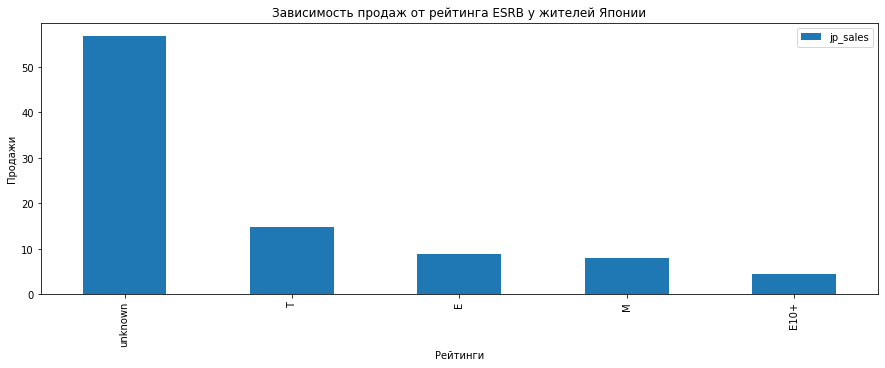

In [58]:
# построим график зависимости продаж от рейтинга ESRB  у жителей Японии
data_2014.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.title("Зависимость продаж от рейтинга ESRB у жителей Японии")
plt.xlabel("Рейтинги")
plt.ylabel("Продажи")

ТОП-3 лидеров рейтингов по классификации ESRB среди игр в Японии выглядит так: игры без рейтинга (с огромным отрывом), T и E.

У жителей Северной Америки и Европы идентичные лидеры продаж игр в зависимости от рейтинга по классификации ESRB: чаще всего продаются игры типов M, игры без рейтинга и E. В Японии на первом месте в ТОПе игры без рейтинга, потом идет T и E. Лидерство игр без рейтинга (с огромным отрывом) связано с тем, вместо североамериканской системы рейтингов ESRB Япония использует свою - CERO. И ее в данном исследовании просто не учитывают.

Выводы по портретам пользователей каждого региона:
* Для пользователей из Северной Америки характерно:
- Использовать в качестве ведущей игровой платформы PS4 (Япония). На 2 и 3 местах - "отечественные" XOne и X360. На 4 и 5 местах - снова японские 3DS и PS3. Продажи японских платформ из ТОП-5 суммарно ненамного, но превосходят продажи "родных" XOne и X360.
- ТОП-5 лидеров жанров среди игр для американцев выглядит так: Shooter, Action, Sports, Role-Playing и Misc.
- ТОП-3 лидеров рейтингов по классификации ESRB среди игр для американцев выглядит так: M, игры без рейтинга и E.

* Для пользователей из Европы характерно:
- Использовать в качестве ведущей игровой платформы PS4 (Япония). Далее по популярности идет американская XOne. 3 последних места в ТОП-5 занимают также японские платформы (PS3, PS и 3DS). Суммарно продажи японских платформ из ТОП-5 в несколько раз превосходят американскую XOne.
- ТОП-5 лидеров жанров среди игр для европейцев выглядит так: Action, Shooter, Sports, Role-Playing и Racing. 4 из 5 позиций здесь совпадают со вкусами жителей Северной Америки.
- ТОП-3 лидеров рейтингов по классификации ESRB среди игр для европейцев выглядит также, как и у американцев: M, игры без рейтинга и E.

* Для пользователей из Японии характерно:
- Использовать в качестве 5 самых популярных платформ только японские: 3DS (с заметным отрывом), PS4, PSV, PS3 и WiiU. Игры на популярных платформах XOne и X360 (США) в Японии практически не покупаются.
- ТОП-5 лидеров жанров среди игр для японцев выглядит так: с колоссальным отрывом лидируют жанры Role-Playing и Action, остальные жанры в ТОПе (Fighting, Misc и Shooter) намного менее популярны, чем эти 2 первых.
- ТОП-3 лидеров рейтингов по классификации ESRB среди игр для японцев выглядит так: игры без рейтинга, потом идет T и E. Лидерство игр без рейтинга (с огромным отрывом) связано с тем, вместо североамериканской системы рейтингов ESRB Япония использует свою - CERO. И ее в данном исследовании просто не учитывают.

У американцев и европейцев достаточно похожи вкусы, особенно это заметно по жанрам игр (4 совпадения в ТОП-5) и рейтингам игр по классификации ESRB (3 совпадения в ТОП-3). У японцев вкусы существенно отличаются. Также в отличие более равномерного ТОП-5 по платформам и жанрам игр, у них по этим параметрам есть явные лидеры: платформа 3DS и жанры Role-Playing и Action.

### Шаг. Проверьте гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [59]:
xone_rating = data[(data['platform'] == 'XOne') &  (data['user_score'] > 0)]['user_score']
pc_rating = data[(data['platform'] == 'PC') &  (data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', xone_rating.mean())
print('Средний пользовательский рейтинг платформы PC:', pc_rating.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 7.064058355437665


H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [60]:
# проверим гипотезу №1
from scipy import stats as st

alpha = .05

results = st.ttest_ind(xone_rating, pc_rating, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.903138894022829e-06
Отвергаем нулевую гипотезу


Выводы по гипотезе №1: в результате нашего исследования нулевая гипотеза (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые) настолько маловероятна для исследуемых данных, что мы отвергаем ее.

Переходим к гипотезе №2.

In [61]:
action_rating = data[(data['genre'] == 'Action') &  (data['user_score'] > 0)]['user_score']
sports_rating = data[(data['genre'] == 'Sports') &  (data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', action_rating.mean())
print('Средний пользовательский рейтинг жанра Sports:', sports_rating.mean())

Средний пользовательский рейтинг жанра Action: 7.058129175946549
Средний пользовательский рейтинг жанра Sports: 6.9527777777777775


H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

In [62]:
# проверим гипотезу №2
alpha = .05

results = st.ttest_ind(action_rating, sports_rating, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07751671595536253
Не получилось отвергнуть нулевую гипотезу


Выводы по гипотезе №2: в результате исследования нашу нулевую гипотезу (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные) не получилось отвергнуть: средние пользовательские рейтинги жанров Action и Sports, скорее всего, разные.

Пояснение по гипотезам:
* В качестве нулевой гипотезы брал ту, что по результатам задачи нужно было подтвердить или опровергнуть. В качестве альтернативной гипотезы брал противоположное нулевой гипотезе условие.
* Для проверки гипотез применил функцию ttest_ind, которая вычисляет t-тест для двух независимых выборок. Это оптимальный вариант решения поставленной задачи.

### Шаг. Напишите общий вывод

I) В начале работы был изучен датафрейм: размеры таблицы, названия колонок, наличие и объемы пропущенных данных, а также типы данных каждой колонки.

II) На этапе предобработки данных было сделано следующее:
* названия колонок приведены к нижнему регистру;
* заменили типы данных в некоторых столбцах на корректные, что позволит в дальнейшем проводить с ними вычисления;
* удалил строки с пропусками в графе 'year_of_release';
* заменили 'tbd' на 'nan' в графе 'user_score', т.к. по сути это тоже самое, но наличие 'tbd' мешало бы нам проводить с данными в этой графе вычисления в дальнейшем;
* удалили по 2 пропуска в графах 'name' и 'genre', т.к. их там было по 2 штуки, и удаление ни на что не повлияет в дальнейшем;
* пропуски в столбцах 'critic_score' и 'user_score' оставили без изменений, т.к., судя по всему, это новые игры, которые еще не получили свои оценки;
* пропуски в столбце 'rating' заменил заглушкой 'unknown' – этот шаг понадобится для анализа данных во второй части проекта;
* рассчитали суммарные продажи каждой игры по всем регионам, поместив эти данные в новый столбец датафрейма;
* проанализировал наличие дублей с одинаковым названием игры и игровой платформы, удалил повторы, хотя их было всего 3 штуки.
В итоге данные стали более чистыми (убрали часть пропусков) и удобными для дальнейшего анализа (заменили типы данных, поставили заглушку 'unknown' в столбец 'rating' вместо пропусков и т.д.).

III) На этапе исследовательского анализа данных было сделано следующее:
1. Изучил график количества выпускаемых игр по годам в период с 1980 (когда вышли первые игры) по 2016 (на котором данные в датафрейме обрываются). Выяснилось, что в период с 1980 по 1993 годы в год выпускалось по 10-20 игр. После 1994 года темпы выпуска игр стали резко расти, это длилось до 2010 года (в конце этого периода в год выпускалось по 1200-1400 игр). После этого наступил резкий спад - до 500-600 игр в год с 2011 по 2016 годы. Также построил график без "дублей" игр (оставил только 1 вариант названия игры, если их было выпущено несколько за год). Распределение это не поменяло, изменились только масштабы графика (вместо пика в 1400 игр стал пик в 1000 игр). Кстати, график четко показывает, что число игр ежегодно росло и достигло своего пика в 2008 году, после чего пошел откат, а, начиная с 2011 года – обвал рынка с точки зрения числа выпускаемых игр в год. Связываю это с мировым финансовым кризисом 2008 года.
2. Изучил лидеров среди платформ по продажам игр. Подробно разобрал «жизненный цикл» ТОП-7 лидеров и сделал такие выводы:
- Средний срок "жизни" платформы - 11 лет.
- Обычно за 5 лет с момента появления первых релизов платформа достигает пика в плане числа выпущенных игр в год.
- После пика, который длится обычно 1 год, идет спад числа выпусков новых игр и через 5 лет спада платформа перестает выпускать новые игры.
В качестве актуального периода для построения прогнозов на 2017 год взял 3 последних года перед 2017 годом, т.е. период с 2014 по 2016 годы. Это связано с тем, что сейчас тренды очень быстро меняются, и больший промежуток времени лучше не брать - он может исказить прогноз на 2017 год. При этом период в 2 года считаю маленьким, т.к. в описании к проекту написано, что данные за 2016 год могут быть неполными.
3. Изучил динамику выпуска новых игр по 10 платформам, по которым были данные за период с 2014 по 2016 годы:
* Динамика у платформ по числу новых продаж в год отрицательная (т.е. число продаж снижалось). Правда, стоит учесть, что по условиям задания данные за 2016 год могут быть неполными. Непонятно, за какой период 2016 года их может не хватать. Если за 1-2 месяца, то это не сильно исказить последний график. А если за бОльший период, часть платформ может показать не падение, а тот же уровень продаж, как в 2015 году, а то и рост. Последнее может быть актуально для платформы 3DS, у которой по данным из графика число продаж в 2015 и 2016 году одинаковое.
* Лидеры по продажам: PS4, 3DS и XOne.
* По остальным платформам продажи за последние годы минимальны и почти равны нулю по итогам 2016 года.
* Из потенциально прибыльных платформ выберу только одну - 3DS, т.к. продажи по ней за 2016 год равны продажам за 2015 год. С учетом возможной неполноты данных за 2016 год она может показать рост. А дальше все зависит от того, за какой период 2016 года может не хватать данных.
4. Изучил корреляцию оценок пользователей и критиков с продажами у лидеров по этому показателю – у платформ PS4, 3DS и XOne, сделал такие выводы:
* Коэффициенты корреляции во всех 6 случаях (3 платформы и 2 параметра корреляции с продажами – оценки пользователей и критиков) оказались слабыми. 
* Диаграммы рассеяния подтвердили эти выводы.
* В основном критики и пользователи дают высокие оценки играм платформы.
5. Проанализировал распределение жанров игр по продажам и получил такие выводы:
А) Если берем в расчет сумму продаж:
* Больше всего продаются игры таких жанров: Action, Sports и Shooter.
* Меньше всего - таких жанров: Adventure и Strategy.
Б) Если берем в расчет медиану продаж (более четкий критерий оценки популярности игр жанра):
* Больше всего продаются игры таких жанров: Shooter (с очень большим отрывом), Sports, Platform и Fighting.
* Меньше всего - таких жанров: Strategy и Adventure.

IV) Далее занялся составлением портрета пользователя для каждого региона и получил такие выводы:
* Для пользователей из Северной Америки характерно:
* Использовать в качестве ведущей игровой платформы PS4 (Япония). На 2 и 3 местах - "отечественные" XOne и X360. На 4 и 5 местах - снова японские 3DS и PS3. Продажи японских платформ из ТОП-5 суммарно ненамного, но превосходят продажи "родных" XOne и X360.
* ТОП-5 лидеров жанров среди игр для американцев выглядит так: Shooter, Action, Sports, Role-Playing и Misc.
* ТОП-3 лидеров рейтингов по классификации ESRB среди игр для американцев выглядит так: M, игры без рейтинга и E.
* Для пользователей из Европы характерно:
* Использовать в качестве ведущей игровой платформы PS4 (Япония). Далее по популярности идет американская XOne. 3 последних места в ТОП-5 занимают также японские платформы (PS3, PS и 3DS). Суммарно продажи японских платформ из ТОП-5 в несколько раз превосходят американскую XOne.
* ТОП-5 лидеров жанров среди игр для европейцев выглядит так: Action, Shooter, Sports, Role-Playing и Racing. 4 из 5 позиций здесь совпадают со вкусами жителей Северной Америки.
* ТОП-3 лидеров рейтингов по классификации ESRB среди игр для европейцев выглядит также, как и у американцев: M, игры без рейтинга и E.
* Для пользователей из Японии характерно:
* Использовать в качестве 5 самых популярных платформ только японские: 3DS (с заметным отрывом), PS4, PSV, PS3 и WiiU. Игры на популярных платформах XOne и X360 (США) в Японии практически не покупаются.
* ТОП-5 лидеров жанров среди игр для японцев выглядит так: с колоссальным отрывом лидируют жанры Role-Playing и Action, остальные жанры в ТОПе (Fighting, Misc и Shooter) намного менее популярны, чем эти 2 первых.
* ТОП-3 лидеров рейтингов по классификации ESRB среди игр для японцев выглядит так: игры без рейтинга, потом идет T и E. Лидерство игр без рейтинга (с огромным отрывом) связано с тем, вместо североамериканской системы рейтингов ESRB Япония использует свою - CERO. И ее в данном исследовании просто не учитывают.
У американцев и европейцев достаточно похожи вкусы, особенно это заметно по жанрам игр (4 совпадения в ТОП-5) и рейтингам игр по классификации ESRB (3 совпадения в ТОП-3). У японцев вкусы существенно отличаются. Также в отличие более равномерного ТОП-5 по платформам и жанрам игр, у них по этим параметрам есть явные лидеры: платформа 3DS и жанры Role-Playing и Action.

V) Занялся проверкой 2 гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Результаты исследования дали следующее:
* Выводы по гипотезе №1: в результате нашего исследования нулевая гипотеза (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые) настолько маловероятна для исследуемых данных, что мы отвергаем ее.
* Выводы по гипотезе №2: в результате исследования нашу нулевую гипотезу (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные) не получилось отвергнуть: средние пользовательские рейтинги жанров Action и Sports, скорее всего, разные.

Как итог, можно сказать следующее. 
1. Платформы выпускают все меньше игр. Спад в индустрии наступил после 2011 года. У всех платформ, у которых выходили новые игры в период с 2014 по 2016 годы наблюдается снижение числа новых релизов, хотя это спорно из-за обрыва данных за 2016 год.
2. Из потенциально прибыльных платформ выберу только одну - 3DS. Она показала в 2016 году тот же уровень продаж, что и в 2015. С учетом возможных неполных данных за 2016 год по факту можем иметь рост продаж.
3. Оценки критиков и пользователей не сильно коррелируют с продажами, впрочем, выставляемые ими оценки обычно и так хорошие.
4. Больше всего продаются (по медиане) игры таких жанров: Shooter (с очень большим отрывом), Sports, Platform и Fighting; меньше всего - таких жанров: Strategy и Adventure.
5. При продаже в конкретных регионах нужно учитывать платформу, жанр и игр и рейтинг по классификации ESRB. У американцев и европейцев достаточно похожи вкусы, особенно это заметно по жанрам игр (4 совпадения в ТОП-5 - речь про Shooter, Action, Sports и Role-Playing) и рейтингам игр по классификации ESRB (3 совпадения в ТОП-3 - речь про M, игры без рейтинга и E). У японцев вкусы существенно отличаются. Также в отличие более равномерного ТОП-5 по платформам и жанрам игр, у них по этим параметрам есть явные лидеры: платформа 3DS и жанры Role-Playing и Action.
6. Оценил 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В результате нашего исследования нулевая гипотеза (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые) настолько маловероятна для исследуемых данных, что мы отвергали ее.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. В результате исследования нашу нулевую гипотезу (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные) не получилось отвергнуть: средние пользовательские рейтинги жанров Action и Sports, скорее всего, разные.